In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from mlxtend.plotting import plot_confusion_matrix
from sklearn import metrics
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier


In [2]:
#read data
tel=pd.read_csv('churn-bigml-20.csv')
tel.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [3]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [4]:
tel.isnull().sum().sort_values(ascending = False)

State                     0
Account length            0
Customer service calls    0
Total intl charge         0
Total intl calls          0
Total intl minutes        0
Total night charge        0
Total night calls         0
Total night minutes       0
Total eve charge          0
Total eve calls           0
Total eve minutes         0
Total day charge          0
Total day calls           0
Total day minutes         0
Number vmail messages     0
Voice mail plan           0
International plan        0
Area code                 0
Churn                     0
dtype: int64

In [5]:
tel['Churn'].value_counts()

False    572
True      95
Name: Churn, dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
newtel=tel.apply(LabelEncoder().fit_transform)


In [7]:
newtel.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,18,100,0,0,0,0,303,47,303,555,26,526,346,36,275,50,4,50,1,0
1,15,48,1,0,0,0,104,87,104,385,29,360,320,57,254,90,6,90,4,1
2,34,143,1,0,0,0,560,17,560,549,43,520,132,74,112,18,9,18,4,1
3,40,94,1,0,0,0,62,53,62,55,48,54,236,51,192,40,6,40,2,0
4,11,32,2,0,0,0,83,67,83,336,55,315,196,36,159,74,1,74,1,0


In [8]:
#splitting data to input and output
X=newtel.drop('Churn',axis=1) #input
y=newtel['Churn']  #output(label)

In [9]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()  
X=scaler.fit_transform(X)    

In [10]:
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)  

In [11]:
print(' X_train.shape : ',X_train.shape)
print(' y_train.shape : ',y_train.shape)
print(' X_test.shape : ',X_test.shape)
print(' y_test.shape : ',y_test.shape)

 X_train.shape :  (533, 19)
 y_train.shape :  (533,)
 X_test.shape :  (134, 19)
 y_test.shape :  (134,)


In [47]:
#model1

In [15]:
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
grid_search=grid.fit(X_train, y_train)
print(grid_search.best_estimator_)


Fitting 10 folds for each of 30 candidates, totalling 300 fits
KNeighborsClassifier(n_neighbors=3)


accuracy: 0.8805970149253731
cross validation score: 0.8890109890109891
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       119
           1       0.45      0.33      0.38        15

    accuracy                           0.88       134
   macro avg       0.69      0.64      0.66       134
weighted avg       0.87      0.88      0.87       134



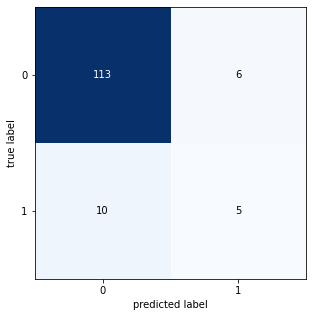

In [26]:
knn = KNeighborsClassifier(n_neighbors =3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print('accuracy:',knn.score(X_test, y_test))
print('cross validation score:',cross_val_score(knn, X_test, y_test, cv=10, scoring='accuracy').mean())
print(classification_report(y_test, pred))
cm = confusion_matrix(y_test, pred)
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, pred)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()

In [ ]:
#model2
#decision tree with grid search

In [17]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5,15,20,21,25],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=10, verbose=True)
grid_search.fit(X_train, y_train)

print(grid_search.best_score_)
print(grid_search.best_estimator_)

Fitting 10 folds for each of 90 candidates, totalling 900 fits
0.8704053109713488
DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5, max_features='auto',
                       random_state=0)


              precision    recall  f1-score   support

           0       0.93      0.98      0.96       119
           1       0.75      0.40      0.52        15

    accuracy                           0.92       134
   macro avg       0.84      0.69      0.74       134
weighted avg       0.91      0.92      0.91       134

cross validation score: 0.8813186813186814
accuracy: 0.917910447761194


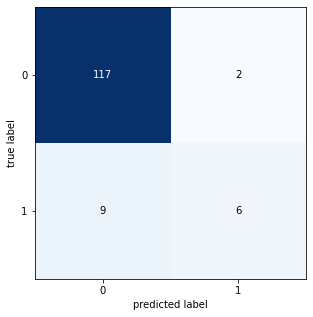

In [24]:
tree_clas =DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5, max_features='auto',
                       random_state=0)
tree_clas.fit(X_train, y_train)
y_predict = tree_clas.predict(X_test)
print(classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
print('cross validation score:',cross_val_score(tree_clas, X_test, y_test, cv=10, scoring='accuracy').mean())
print('accuracy:',tree_clas.score(X_test, y_test))
cm = confusion_matrix(y_test, y_predict)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()

In [ ]:
#model 3
# random forest

In [19]:
#grid Search

rfc = RandomForestClassifier()
params = {'n_estimators': [3,10,30,100], 'criterion': ['gini', 'entropy'],'class_weight':[None, 'balanced', 'balanced_subsample']}
mysearch = GridSearchCV(rfc, params, cv=10,verbose=True)
mysearch.fit(X_train,y_train)
print(mysearch.best_estimator_)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
RandomForestClassifier(criterion='entropy')


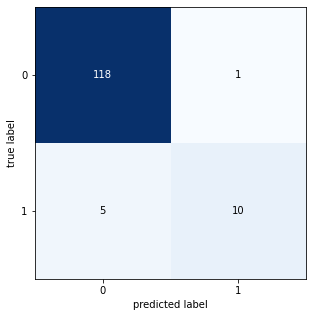

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       119
           1       0.91      0.67      0.77        15

    accuracy                           0.96       134
   macro avg       0.93      0.83      0.87       134
weighted avg       0.95      0.96      0.95       134

accuracy: 0.9552238805970149
accuracy cross validation: 0.9263736263736264


In [18]:
random_forest =RandomForestClassifier(criterion='entropy')
random_forest.fit(X_train, y_train)
y_predict = random_forest.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_predict)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()      
print(classification_report(y_test, y_predict))
print('accuracy:',random_forest.score(X_test, y_test))
print('cross validation score:',cross_val_score(random_forest, X_test, y_test, cv=10, scoring='accuracy').mean())


In [ ]:
#model 4
#support vector machine

In [21]:
#Grid Search
svm_model =svm.SVC()
parameters = {'kernel':('linear', 'rbf'),'C':(1,2,5,10,11,15), 'gamma': (1, 0.1, 0.01)}
clf = GridSearchCV(svm_model, parameters, verbose=True,cv=5)
clf.fit(X_train,y_train)
print(clf.best_estimator_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
SVC(C=5, gamma=0.1)


              precision    recall  f1-score   support

           0       0.93      0.96      0.94       119
           1       0.55      0.40      0.46        15

    accuracy                           0.90       134
   macro avg       0.74      0.68      0.70       134
weighted avg       0.88      0.90      0.89       134

accuracy: 0.8955223880597015
cross validation score: 0.8967032967032967


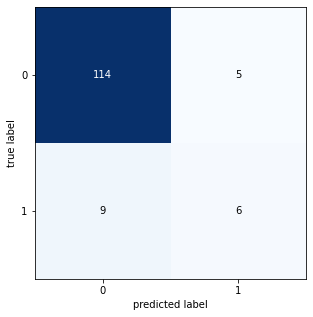

In [19]:
svm_model =svm.SVC(C=5, gamma=0.1)
svm_model.fit(X_train, y_train)
y_predict = svm_model.predict(X_test)
print(classification_report(y_test, y_predict))
print('accuracy:',svm_model.score(X_test, y_test))
print('cross validation score:',cross_val_score(svm_model, X_test, y_test, cv=10, scoring='accuracy').mean())
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_predict)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show() 

In [ ]:
#model 5
#adaboost

In [23]:
ada_model= AdaBoostClassifier()
parameters = {'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 20, 30]}
clf = GridSearchCV(ada_model, parameters, cv=10, verbose=True)
clf.fit(X_train, y_train)
print(clf.best_score_)
print(clf.best_estimator_)

Fitting 10 folds for each of 14 candidates, totalling 140 fits
0.8555206149545773
AdaBoostClassifier(n_estimators=6)


              precision    recall  f1-score   support

           0       0.91      0.98      0.95       119
           1       0.67      0.27      0.38        15

    accuracy                           0.90       134
   macro avg       0.79      0.62      0.66       134
weighted avg       0.89      0.90      0.88       134

accuarcy: 0.9029850746268657
cross validation score: 0.8521978021978022


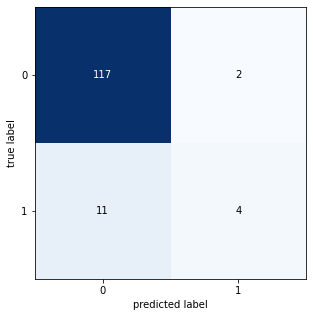

In [20]:
ada_model = AdaBoostClassifier(n_estimators=6)
ada_model.fit(X_train, y_train)
pred_ada_model= ada_model.predict(X_test)
print(classification_report(y_test, pred_ada_model))
print('accuarcy:',ada_model.score(X_test, y_test))
print('cross validation score:',cross_val_score(ada_model, X_test, y_test, cv=10, scoring='accuracy').mean())
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, pred_ada_model)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show() 

In [67]:
#model 5
#logistic regression

In [25]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
# define grid search
grid = dict(solver=solvers,penalty=penalty)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, verbose=True)
grid_result = grid_search.fit(X_train, y_train)
print(grid_result.best_score_)
print(grid_result.best_estimator_)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
0.847963322165403
LogisticRegression(solver='newton-cg')


              precision    recall  f1-score   support

           0       0.92      0.99      0.96       119
           1       0.83      0.33      0.48        15

    accuracy                           0.92       134
   macro avg       0.88      0.66      0.72       134
weighted avg       0.91      0.92      0.90       134

accuracy: 0.917910447761194
cross validation score: 0.8890109890109891


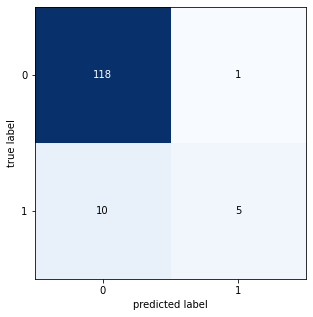

In [21]:
log_reg =LogisticRegression(solver='newton-cg')
log_reg.fit(X_train, y_train)
y_predict = log_reg.predict(X_test)
print(classification_report(y_test, y_predict))
print('accuracy:',log_reg.score(X_test, y_test))
print('cross validation score:',cross_val_score(log_reg, X_test, y_test, cv=10, scoring='accuracy').mean())
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, y_predict)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()


In [ ]:
#model 6
#naive bias

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       119
           1       0.73      0.53      0.62        15

    accuracy                           0.93       134
   macro avg       0.84      0.75      0.79       134
weighted avg       0.92      0.93      0.92       134

accuracy: 0.9253731343283582
cross validation score: 0.887912087912088


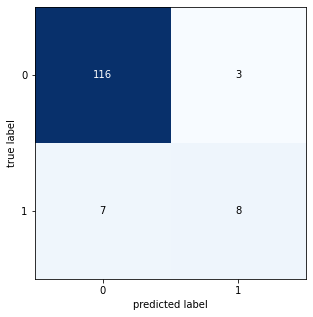

In [22]:
NB = GaussianNB()
NB.fit(X_train, y_train)
pred_NB = NB.predict(X_test)
print(classification_report(y_test, pred_NB))
print('accuracy:',NB.score(X_test, y_test))
print('cross validation score:',cross_val_score(NB, X_test, y_test, cv=10, scoring='accuracy').mean())
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, pred_NB)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()

In [29]:
params={'n_estimators': [100,200,300,500],'learning_rate': [0.01,0.1,1],'max_depth':[3,4,5]}
gbm=GradientBoostingClassifier()
grid_search = GridSearchCV(estimator=gbm, param_grid=params, n_jobs=-1, cv=5, verbose=True)
grid_result = grid_search.fit(X_train, y_train)
print(grid_result.best_score_)
print(grid_result.best_estimator_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
0.9117439605007934
GradientBoostingClassifier(max_depth=4, n_estimators=300)


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       119
           1       0.87      0.87      0.87        15

    accuracy                           0.97       134
   macro avg       0.92      0.92      0.92       134
weighted avg       0.97      0.97      0.97       134

accuracy: 0.9701492537313433
cross validation score: 0.9263736263736264


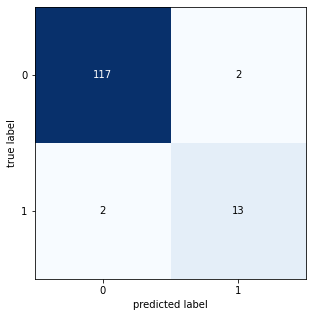

In [23]:
gboost = GradientBoostingClassifier(max_depth=4, n_estimators=300)
gboost.fit(X_train, y_train)
pred_gboost = gboost.predict(X_test)
print(classification_report(y_test, pred_gboost))
print('accuracy:',gboost.score(X_test, y_test))
print('cross validation score:',cross_val_score(gboost, X_test, y_test, cv=10, scoring='accuracy').mean())
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_test, pred_gboost)
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()

In [13]:
#model 1 ==> KNN , accuracy=0.8805970149253731
#model2 ==> Decision Tree , accuracy=0.917910447761194
#model 3 ==> Random Forest ,accuracy=0.9552238805970149
#model 4 ==> SVM , accuracy=0.8955223880597015
#model 5 ==> adaboost , accuracy=0.9029850746268657
#model 6 ==> Logistic regression , accuracy=0.917910447761194
#model 7 ==>Naive Biase , accuracy=0.9253731343283582
#model 8==>Gradient boost,accuracy=0.9701492537313433

#best model is  Gradient boost with accuracy=0.9701492537313433